In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  #a popular plot style in R

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report

# Data loading

In [185]:
#url="https://github.com/Jennifer-ning/Practices-DS-takehome-Ning/blob/main/1.conversion_rate/conversion_data.csv"
#data=pd.read_csv(url, sep=',',
#                  lineterminator='\r',
#                  error_bad_lines=False)
data=pd.read_csv('/Users/ningzhang/Study/DataScience_takehome/Practices-DS-takehome-Ning/1.conversion_rate/conversion_data.csv')
data.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [186]:
# The information contains the number of columns, column labels, column data types, 
# memory usage, range index, and the number of cells in each column (non-null values).
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [187]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [188]:
# check whether there is any null value
data.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [189]:
#understand the value of each column
for col in data.columns:
    uniques=sorted(data[col].unique())
    print('{0:20s} {1:5d}\t'.format(col, len(uniques)), uniques[:5])
    #print(col, ' ', len(uniques), ' ', uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


# Remove outliers

Typical age should be below 100. while max of age =123, let's check.

In [190]:
print(data['age'].unique())
data[data['age']>=100]

[ 25  23  28  39  30  31  27  29  38  43  24  36  37  33  20  35  17  50
  22  18  34  19  42  32  21  48  40  41  26  45  44  49  46  56  52  54
  51  47  53  60  57  55  59  61  58  62  65  63  66  67  64  68  69 123
  70  73  77  72  79 111]


,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [191]:
data=data[data['age']<100]
data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# Exploratory Data Analysis

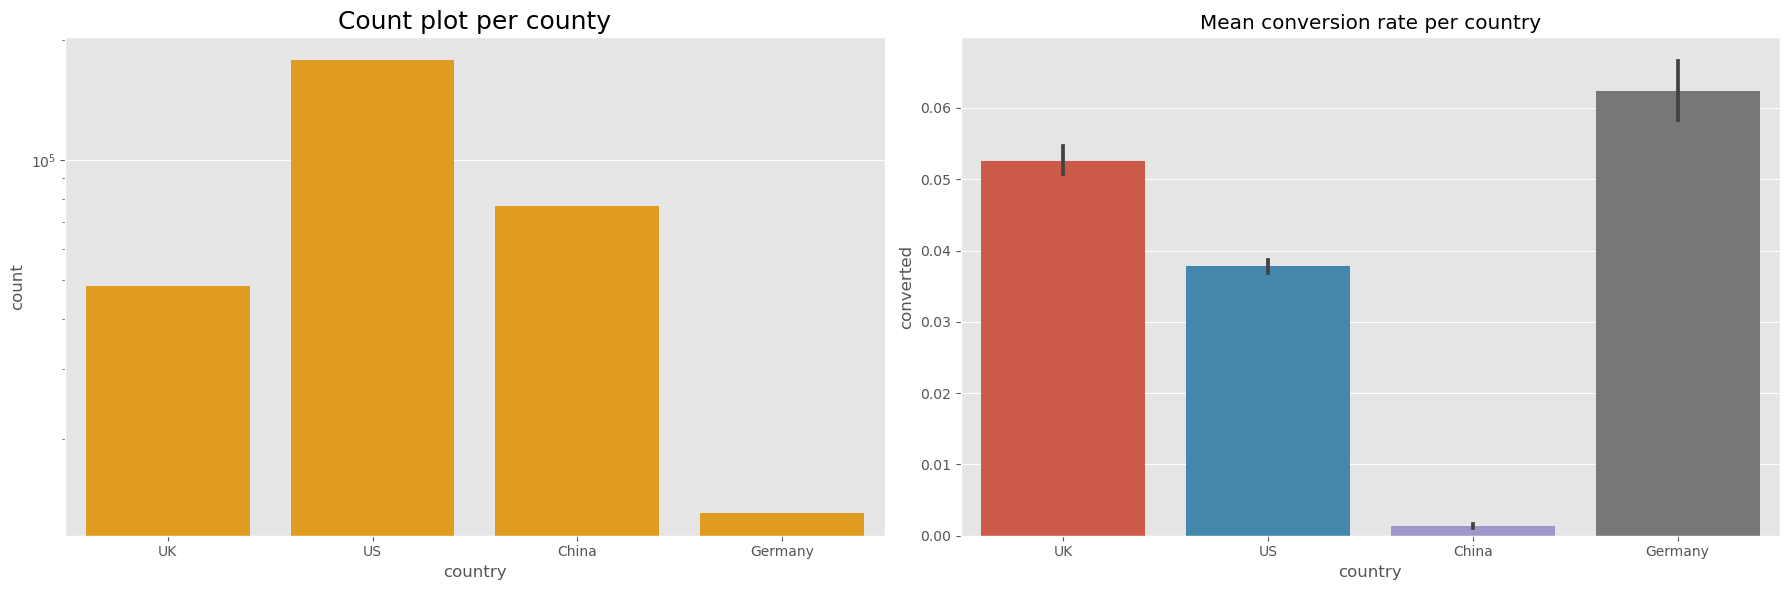

In [192]:
# visualization of country data
cols=data.columns
groups=data[[cols[0], cols[-1]]].groupby([cols[0]]).mean().reset_index()
groups.head()
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(18,6))
#sns.countplot(x=cols[0], hue=cols[-1], data=data, ax=ax[0])  
#ax[0].set_title('Count plot of country', fontsize=18)
#ax[0].set_yscale('log')

sns.countplot(data=data, x=cols[0],  color='orange', ax=ax[0])
ax[0].set_title('Count plot per county', fontsize=18)
#when to use 'log' scale: A logarithmic scale in which one axis has the value in a regular interval 
# and the other axis has values incrementing at the power of 10 is used to plot larger values in mathematics.
ax[0].set_yscale('log')


sns.barplot( data=data, x=cols[0], y=cols[-1], ax=ax[1])
ax[1].set_title('Mean conversion rate per country')
plt.tight_layout()
plt.show()

Findings from above figures.
- There are many users from China but the conversion rate is very low.
- There are few users from Germany but the conversion rate is the highest.

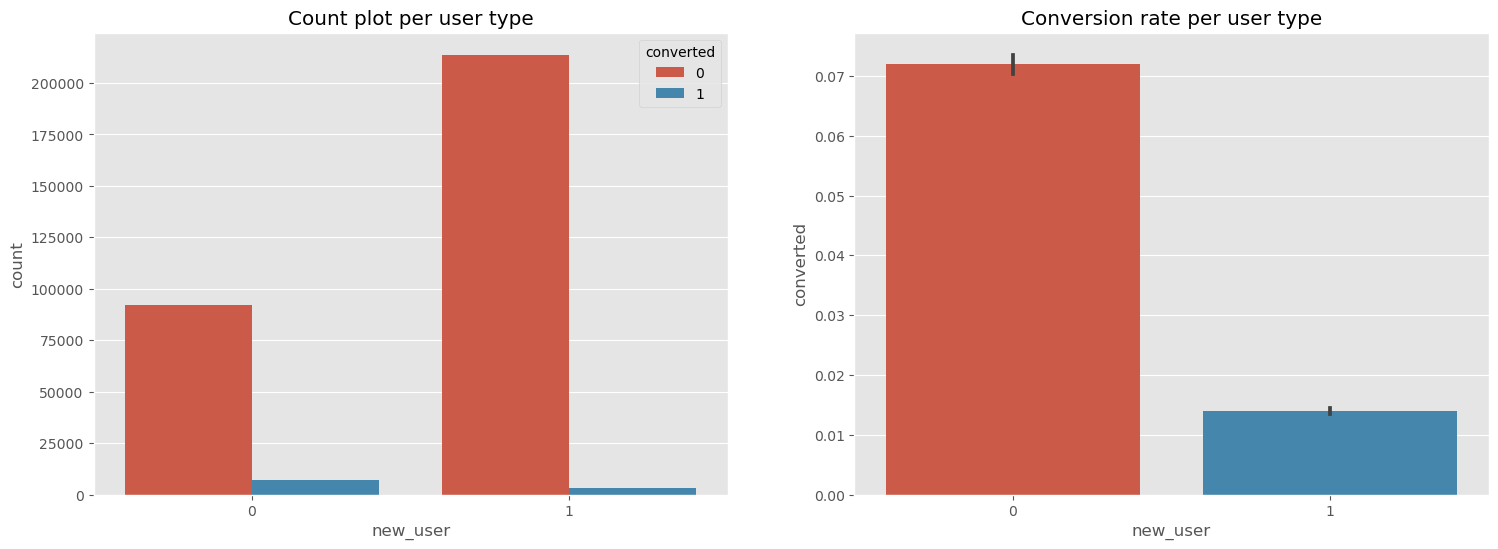

In [193]:
# visualization of user type data
grouped=data[[cols[2], cols[-1]]].groupby(cols[2]).mean().reset_index()
grouped

fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(data=data, x=cols[2], hue=cols[-1], ax=ax[0]) # hue can split bar into 2 bars based on the coversion column value 0,1
ax[0].set_title('Count plot per user type')

sns.barplot(data=data, x=cols[2], y=cols[-1], ax=ax[-1])
ax[1].set_title('Conversion rate per user type')
plt.tight_layout
plt.show()

Findings from above figures
- The number of new users is much larger than old users. While, the old users have a higher conversion rate.

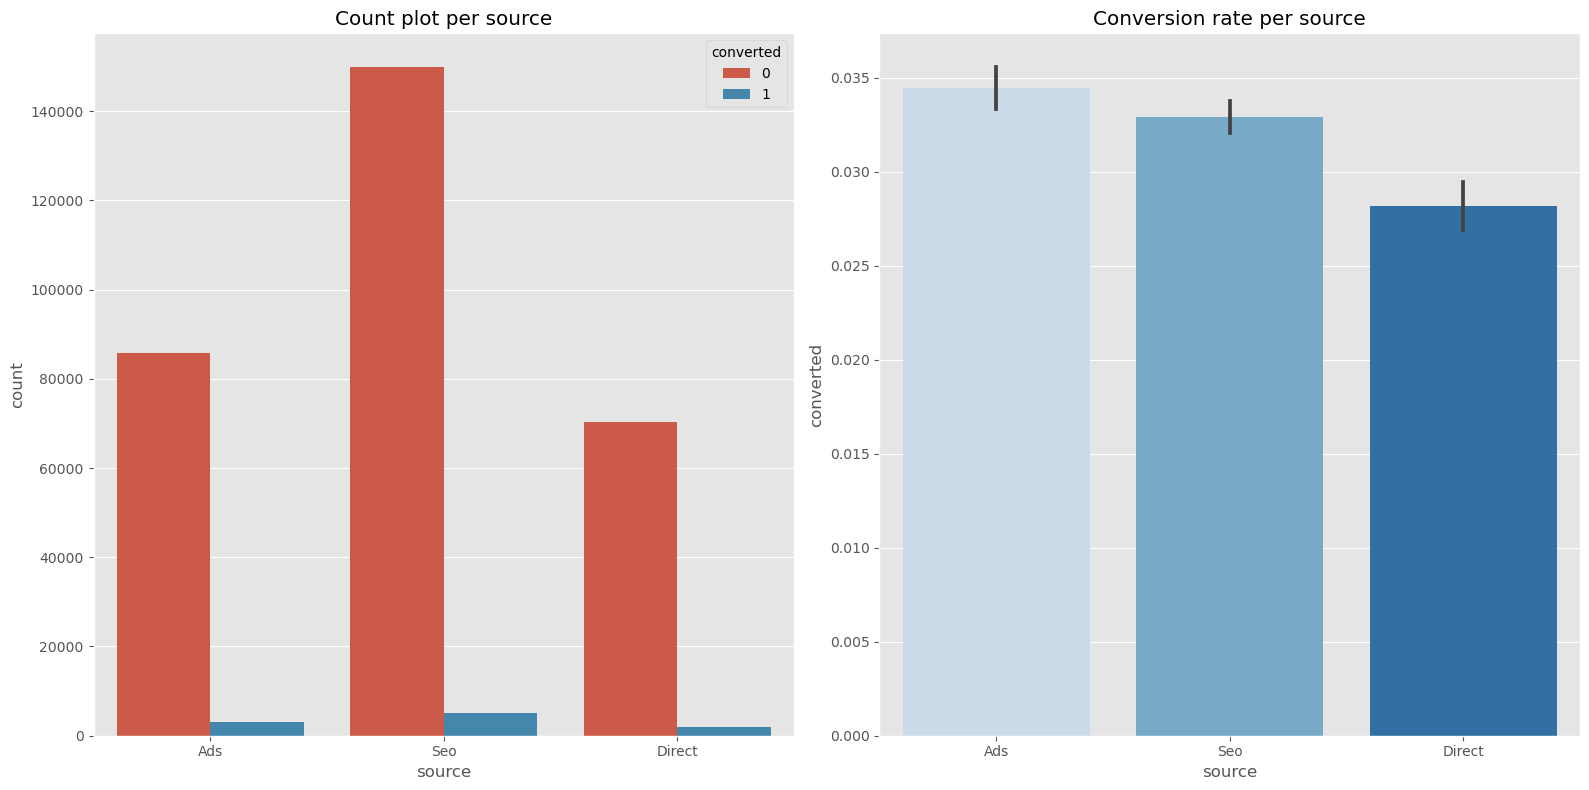

In [194]:
# visualization of sources data
grouped=data[[cols[3], cols[-1]]].groupby(cols[3]).mean().reset_index()
grouped
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sns.countplot(data=data, x=cols[3], hue=cols[-1],  ax=ax[0])
ax[0].set_title('Count plot per source')

sns.barplot(x=cols[3], y=cols[-1], data=data, palette='Blues', ax=ax[1])
ax[1].set_title('Conversion rate per source')
plt.tight_layout()
plt.show()

Finding from above figures
- Though the seo source has the most instances, the conversion rate for all the three source types is not obviously different.

/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_14894/3431829292.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0',
/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_14894/3431829292.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

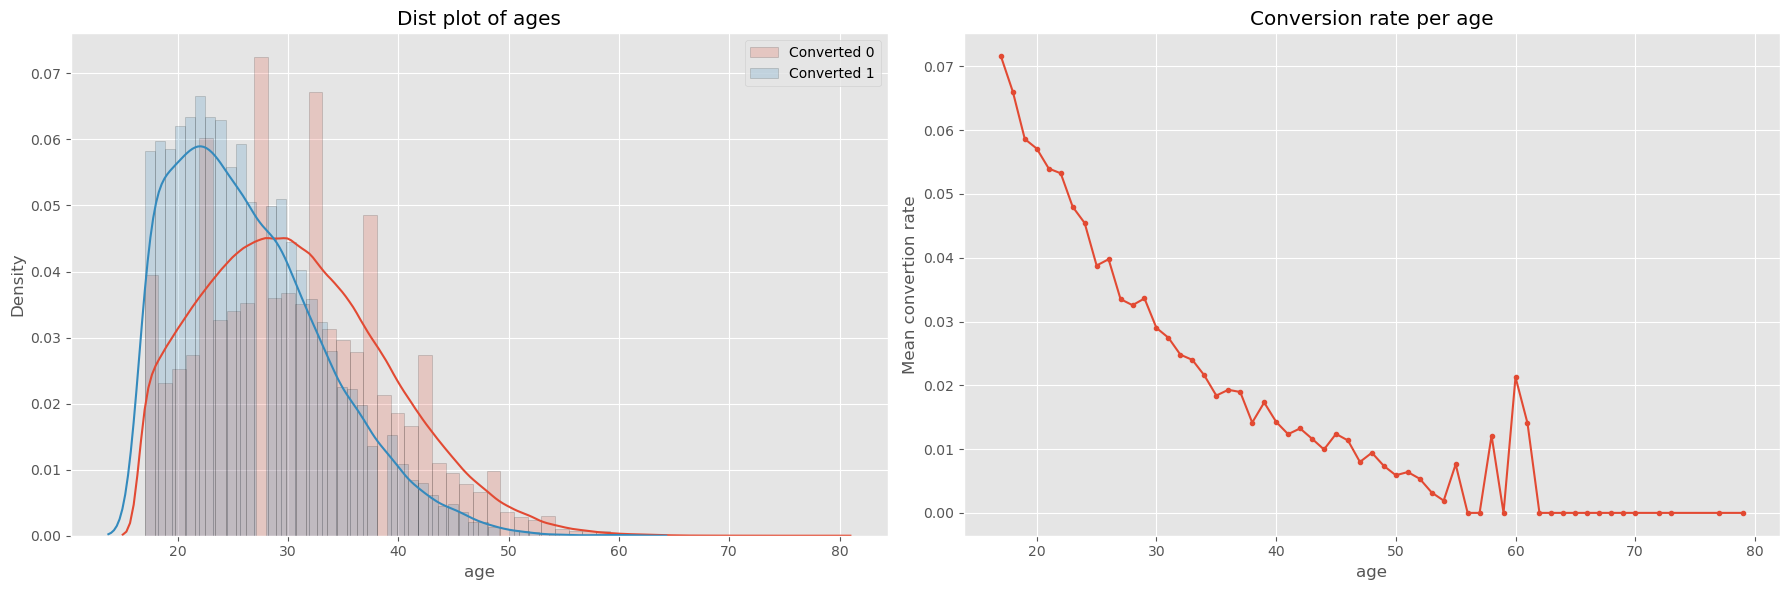

In [195]:
# Visualization of ages
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
#sns.displot(data=data[data['converted'] == 0], x=cols[1], stat="density",  kde=True, ax=ax[0])
#sns.displot(data=data[data['converted'] == 1], x=cols[1], stat="density",  kde=True, ax=ax[0])
ax[0].set_title('Dist plot of ages')
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Conversion rate per age')
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
plt.tight_layout()
plt.show()

Findings from above figures
- Most users are younger than 50. 
- Generally, the conversion rate decreases with the increase of age.

/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_14894/492585180.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data[cols[-1]]==0][cols[4]], label='Conversion=0', hist_kws=hist_kws, ax=ax[0])
/var/folders/_g/1x3fm8xd1xd2bj18tbx2zb4r0000gn/T/ipykernel_14894/492585180.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

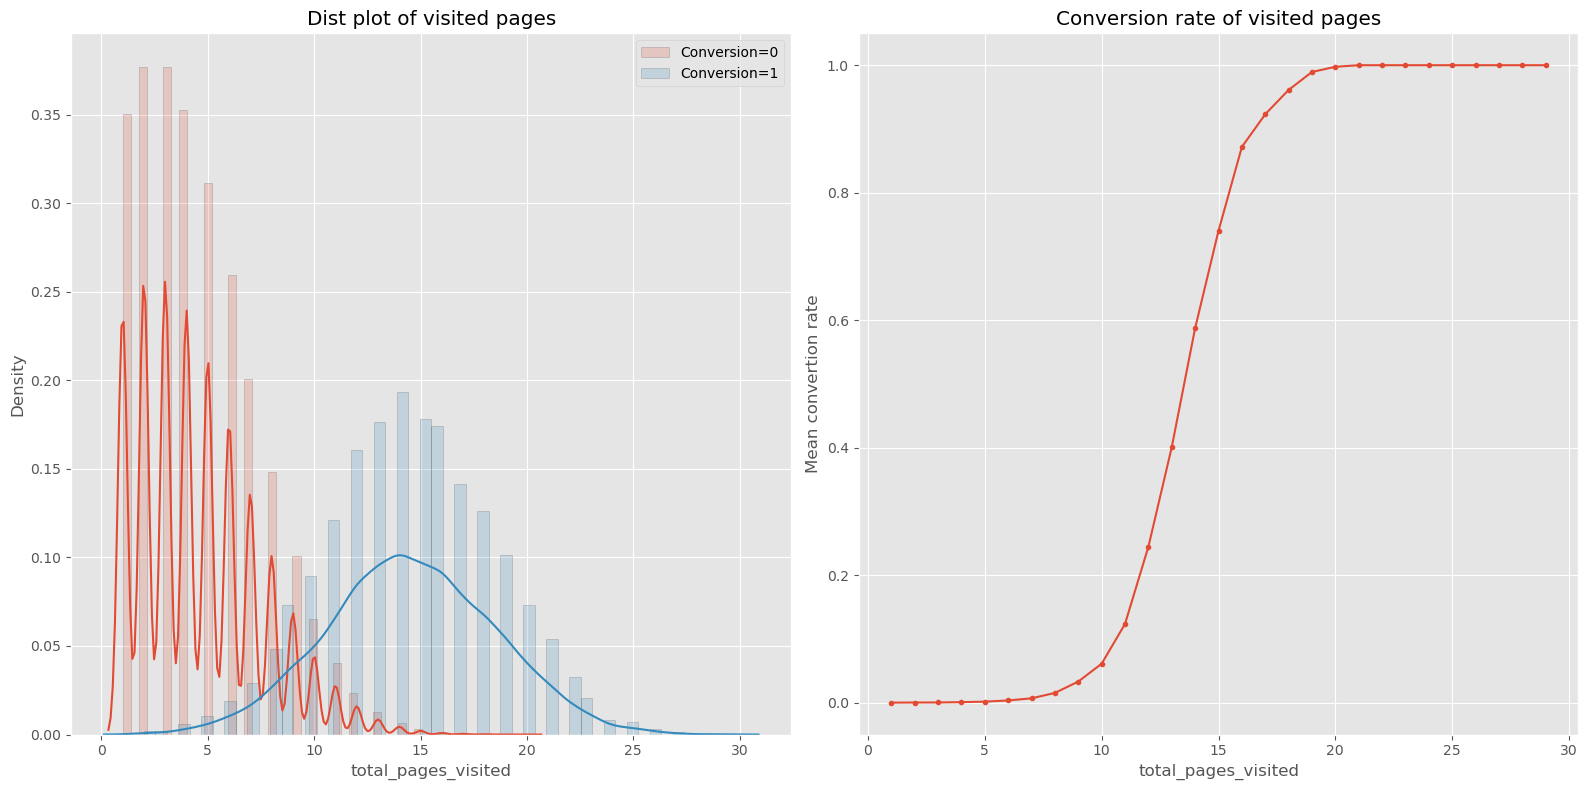

In [196]:
# Visualization of visited pages
grouped=data[[cols[4], cols[-1]]].groupby(cols[4]).mean().reset_index()
grouped

fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(16,8))
sns.distplot(data[data[cols[-1]]==0][cols[4]], label='Conversion=0', hist_kws=hist_kws, ax=ax[0])
sns.distplot(data[data[cols[-1]]==1][cols[4]], label='Conversion=1', hist_kws=hist_kws, ax=ax[0])
ax[0].legend()
ax[0].set_title('Dist plot of visited pages')
ax[1].plot(grouped[cols[4]], grouped[cols[-1]], '.-')
ax[1].set_title('Conversion rate of visited pages')
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
fig.tight_layout()
fig.show()

Findings from above figures
- Visiting more pape brings a positive conversion effect.
- With the increase of visited page number, the conversion rate has an increase, particularly for the pages around 15.

# Machine learning model -- LogisticRegressionCV

In [213]:
# one-hot encoding of categorical features (to numerical valuse): country and scource
data.head()
x=data.loc[:,cols[:-1]]
x=pd.get_dummies(x)
x.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [209]:
y=data['converted']
y.mean()

0.03225194340255157

From the y mean, we know that the target value is very imbalanced. So we should not use plain 'accuracy' as the metric to judge a classifier is good or not. A prediction at least has 97% accuracy without training.

Feature selection

In [214]:
## selection method 1
import statsmodels.api as sm
# since doing dummy all contries and sources can induce dependancy between features, so we test feasture selection by removing one
feature_cols = ['country_Germany', 'country_UK', 'country_US','age', 'new_user','source_Direct', 'source_Seo','total_pages_visited']
X = x[feature_cols]
logit_model = sm.Logit(y,X)
#fit the model
result = logit_model.fit()
print (result.summary())

#the P values for all the variables are smaller than 0.05, therefore, most of them are significant to the model

Optimization terminated successfully.
         Current function value: 0.057637
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               316198
Model:                          Logit   Df Residuals:                   316190
Method:                           MLE   Df Model:                            7
Date:                Sun, 09 Apr 2023   Pseudo R-squ.:                  0.5955
Time:                        16:45:24   Log-Likelihood:                -18225.
converged:                       True   LL-Null:                       -45053.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
country_Germany         0.4486      0.068      6.641      0.000       0.316       0.581
c

In [223]:
## selectio nmethod 2 
# this method can we list all dummy features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Instantiate the estimator - create an instance of LogisticRegression model
logreg = LogisticRegression()

#the numeric values means how many features to select, but how do we decide the number?
rfe = RFE(logreg, n_features_to_select=10, step=1)
rfe = rfe.fit(x,y)
print (rfe.support_)
print (rfe.ranking_)
#selected features rank 1 or support is True

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [199]:
# split data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=42)
ytrain.mean(), ytest.mean()

(0.03237582340131383, 0.0319628926839553)

Both ytrain, ytest are similar to y.mean(), so we can say our split doesn't import bias.

## Classify via logistic regression

__ROC__ (receiver opertor characteristic) curve makes it easy to identify the best AUC theshold for making a decision. 
- Yaxis is true positive rate, =sensitivity or recall, =TP/(TP+FN)
- Xaxis is the false positive rate, = (1-specificity), =FP/(FP+TN)

__AUC__ (area under curve) can help you decide which categrization method (ML method) is better. 

__People often replace False Positive rate with Precision, when there are lots of samples that are 0.__
- Precision=TP/(TP+FP), precision does not include the number of True negative in its calculation, and is not effected by the imbalance.

Confusion matrix: TP FP  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; FN TN

Youtube toturial-ROC and AUC: https://www.youtube.com/watch?v=4jRBRDbJemM

In [200]:
model=LogisticRegressionCV(Cs = np.logspace(-3,3,7), #Cs is the inverse of regularization strength, a grid of Cs values are chosen in a logarithmic scale between 1e-4 and 1e4.
                            dual=False, scoring='roc_auc', max_iter=1000, n_jobs=-1)
model.fit(xtrain,ytrain)

LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                     max_iter=1000, n_jobs=-1, scoring='roc_auc')

In [201]:
model.C_  # the best C is the average of the Cs that correspond to the best roc_auc scores for each fold (my understand is that this fold is test fold)

array([100.])

In [202]:
model.scores_[1].mean(axis=0).max()  # first get the mean of scorce for each C value across all folds, and then select the max mean score across all C values

0.9859229065377721

In [203]:
model.n_iter_ # the number of iteration actually used

array([[[ 73,  92,  71,  47,   1,  38,   1],
        [ 39,  36,  82,  52,   1,  18,   1],
        [ 58,  67, 101,  39,  11,   2,   1],
        [ 56,  68, 136,  47,   1,  30,   1],
        [ 64,  45,  46,  72,  29,  12,   1]]], dtype=int32)

Understand accuracy

In [204]:
print('Train score: ', model.score(xtrain,ytrain))
print('Test score: ', model.score(xtest,ytest))
print('Accuracy only based on data: ', 1-ytest.mean())

Train score:  0.9859752734256448
Test score:  0.9861608003830266
Accuracy only based on data:  0.9680371073160448


In [205]:
ytest_pre=model.predict(xtest)
print(classification_report(y_true=ytest, y_pred=ytest_pre))
# Precision=TP/(TP+FP)
#recall=TP/(TP+FN) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91828
           1       0.86      0.70      0.77      3032

    accuracy                           0.99     94860
   macro avg       0.93      0.85      0.88     94860
weighted avg       0.99      0.99      0.99     94860



Findings:
- Frove above two lines, we know for 'label=converted', if we use the default cutoff 0.5, we can have a high prediction of 0.86 but not a very high recalL of 0.7, which means we classify 30% converted users as non-converted. 
- If we care more about not losing a valued customer, that means prevent from predicting converted users as non-converted users, we need to lower down the cutoff probability to be 1, which will increase the recall value with the price lower than precision.  
Commonly, it defines FP cost as c--cutoff, and FN cost as 1-c. So cutoff=1 means no allocance of FN, which predicts all valued uers as converted.
- Since this is an imbalanced classification problem, if we group all data as 'non-converted', we can still have 96.8% accuracu. Our LR-cv model gets a 99% accuracy, which indicates it is a model which makes sense.  

Understand feature importance

,Feature,coef,Import
3,country_China,-2.670694,2.670694
1,new_user,-1.736520,1.736520
4,country_Germany,1.122315,1.122315
5,country_UK,0.914672,0.914672
2,total_pages_visited,0.759602,0.759602
6,country_US,0.512042,0.512042
8,source_Direct,-0.150604,0.150604
0,age,-0.076287,0.076287
7,source_Ads,0.017314,0.017314
9,source_Seo,0.011624,0.011624


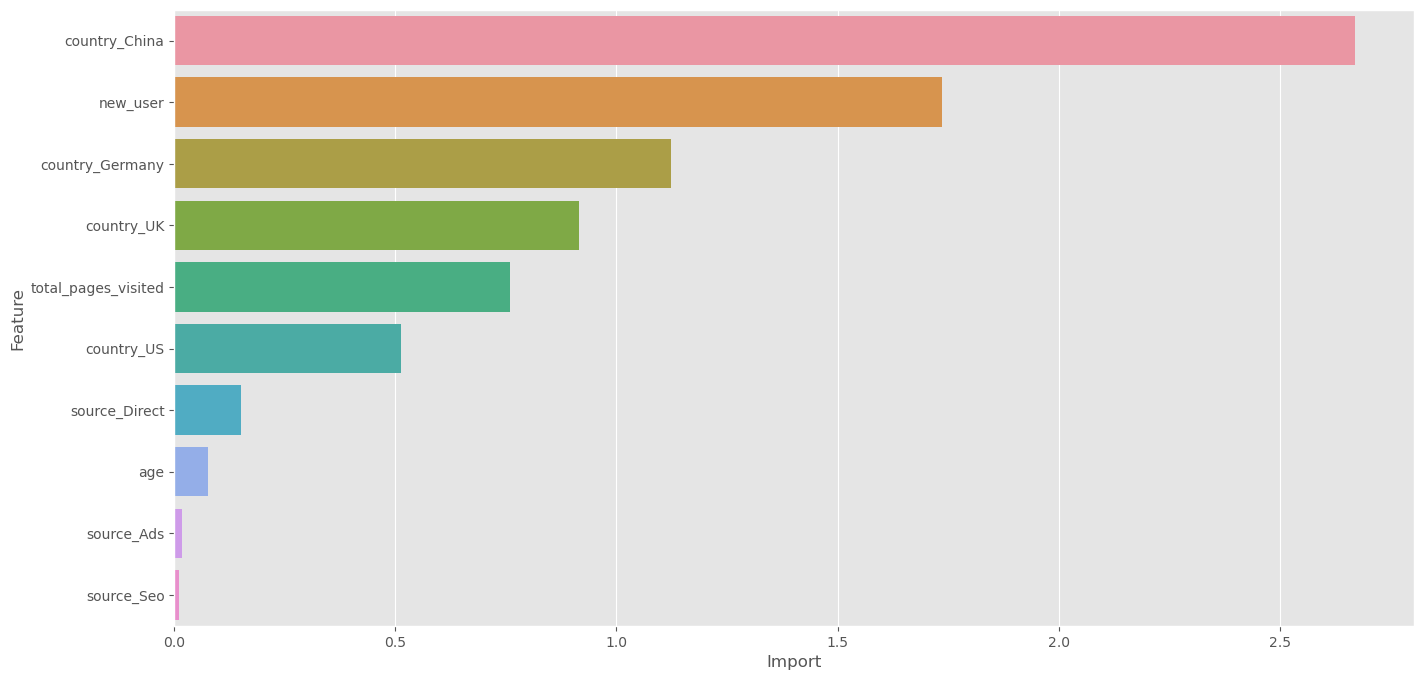

In [206]:
importance=pd.DataFrame({'Feature': xtrain.columns, 'coef': model.coef_[0]})
importance['Import']=np.abs(importance['coef'])
importance.sort_values(by='Import', inplace=True, ascending=False)
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=importance, y='Feature', x='Import')
importance

Summarization of model:
- Conversion rate among China is very bad from the exploratory data analysis. There are many users but a very low convertion rate. Consider China's population and economy, China market is huge and should be paid attention. We should consider whether our website has good Chinese translation and stasify Chinese users' culture requirement.
- Conversion rate among Germany is good, though there isn't lots of users. It implies a huge opportunity for us to target Germany market. For example, put more advertisement in German.
- Old users have a better conversion rate than new users. We should keep touch with them, for example, send promotion email or coupons to old users.
- Age is a negtative factor. The biger the user is, the lower conversion likely is. We should figure out why young people loves the webpages and then strengthen it. Also, find out why older users don't like the webpage and correct it.
- totl visted pages is a positive factor. The longer the user spent on the website, the more likely he/she will convert and buy something. We can desing our webpages more attractive. Meanwhile, for users who spent a long time on it but didn't shop, we can send email to remind them.
- The source factor has the lightest weight to the conversion. If more efforts can put on this, we should pay more attention on Ads and seo, since these two has the positive improtance as least.

# ML method -- Random Forest and CV

Random forest introduction  
- In case, of random forest, these ensemble classifiers are the randomly created decision trees. Each decision tree is a single classifier and the target prediction is based on the majority voting method.
- https://www.youtube.com/watch?v=J4Wdy0Wc_xQ. The general idea is that 1) make a bootstrapped dataset 2) build a tree considerin a subset of variables at each step. 

- Pros: can be used in both regression and classification problems, 
can be also used in variable selection
- Cons: prone to overfitting, especially when working with relatively small datasets.

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [261]:
print(x.head())
print(y.mean())
print(x.shape, y.shape)

   age  new_user  total_pages_visited  country_China  country_Germany  \
0   25         1                    1              0                0   
1   23         1                    5              0                0   
2   28         1                    4              0                0   
3   39         1                    5              1                0   
4   30         1                    6              0                0   

   country_UK  country_US  source_Ads  source_Direct  source_Seo  
0           1           0           1              0           0  
1           0           1           0              0           1  
2           0           1           0              0           1  
3           0           0           0              0           1  
4           0           1           0              0           1  
0.03225194340255157
(316198, 10) (316198,)


In [262]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(221338, 10) (94860, 10) (221338,) (94860,)


In [263]:
# create RF model
modelrf=RandomForestClassifier(n_estimators=50,n_jobs=-1, random_state=1)
modelrf.fit(xtrain,ytrain)
print('Train acc: ', modelrf.score(xtrain,ytrain))
print('Test acc: ', modelrf.score(xtest,ytest))

Train acc:  0.9884384967786823
Test acc:  0.984134514020662


In [264]:
# apply model to predict test data
y_pred=modelrf.predict(xtest)
modelrf.predict_proba(xtest) # the predict probability of each x

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.66023473, 0.33976527],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [265]:
# calculate accuracy
metrics.accuracy_score(ytest,y_pred)
confmatrix=metrics.confusion_matrix(ytest,y_pred)
print(confmatrix)

[[91288   511]
 [  994  2067]]


## Insert cross-validataion into RandomForest: Check overfitting

In [266]:
# use kfold
from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=10, random_state=7, shuffle=True)
modelrfcv=RandomForestClassifier()
results=cross_val_score(modelrfcv, xtrain,ytrain, cv=kfold, scoring='accuracy')
print('rfcv mean accuracy: ', results.mean())

rfcv mean accuracy:  0.9841961154436255


In [296]:
# use stratified kfold
from sklearn.model_selection import StratifiedKFold, cross_val_score
strakfold=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
modelrfcv=RandomForestClassifier()
results=cross_val_score(modelrfcv, xtrain,ytrain, cv=strakfold, scoring='accuracy')
print('rfcv mean accuracy: ', results.mean())

rfcv mean accuracy:  0.9843542458645084


From above cross_val_score, we can see that the RF model is good to use since the gap between non-CV and CV is small, which didn't show overfitting.

## Insert Grid search cross-validataion into RandomForest

In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [269]:
x.head()
print(y.mean())
print(x.shape, y.shape)

xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.3, random_state=1)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

0.03225194340255157
(316198, 10) (316198,)
(221338, 10) (94860, 10) (221338,) (94860,)


In [275]:
# create RF with grid CV
model3=RandomForestClassifier(n_jobs=-1, random_state=1)
param_grid={'n_estimators': [100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6],
    'criterion' :['gini', 'entropy']}
gridcvRF=GridSearchCV(estimator=model3, param_grid=param_grid, cv=3)
gridcvRF.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]})

In [276]:
gridcvRF.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [285]:
model3final=RandomForestClassifier(n_estimators=100,max_features='auto', max_depth=6,criterion='entropy', n_jobs=-1, random_state=42)
model3final.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=6, n_jobs=-1,
                       random_state=42)

In [286]:
ypred=model3final.predict(xtest)
print('accuracy: ', accuracy_score(ytest,ypred))
print(classification_report(y_true=ytest, y_pred=ypred))


accuracy:  0.985821210204512
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91799
           1       0.85      0.68      0.75      3061

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.87     94860
weighted avg       0.98      0.99      0.99     94860



,Feature,coef,Import
2,total_pages_visited,0.836082,0.836082
1,new_user,0.076022,0.076022
3,country_China,0.048041,0.048041
0,age,0.024980,0.024980
5,country_UK,0.006579,0.006579
6,country_US,0.004706,0.004706
4,country_Germany,0.002566,0.002566
8,source_Direct,0.000491,0.000491
7,source_Ads,0.000291,0.000291
9,source_Seo,0.000241,0.000241


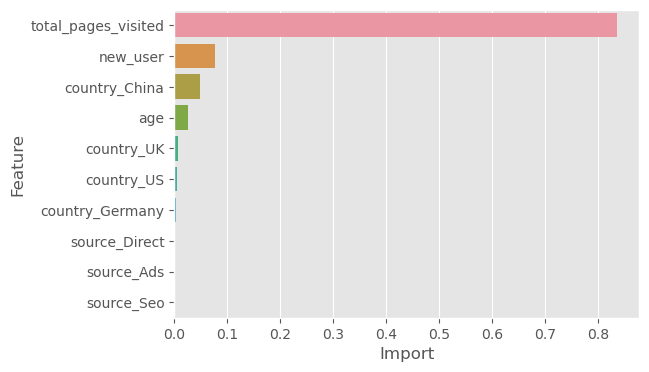

In [300]:
model3final.feature_importances_
importance=pd.DataFrame({'Feature': xtrain.columns, 'coef': model3final.feature_importances_})
importance['Import']=np.abs(importance['coef'])
importance.sort_values(by='Import', inplace=True, ascending=False)
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=importance, y='Feature', x='Import')
importance